# 심화과제


Req-7. 명세서 9p의 내용을 따라 Face Detection을 하는 코드를 작성하고 실행해 보세요.

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 106kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=512f1c35392c606baa1f93341770850b2e524f758d0bb9efa65d50723a144650
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [5]:
import cv2, os
import face_recognition as fr
from IPython.display import Image, display
from matplotlib import pyplot as plt

In [6]:
image_path = "/gdrive/MyDrive/gg01.png"

In [7]:
image = fr.load_image_file(image_path)
face_locations = fr.face_locations(image)

In [8]:
for (top, right, bottom, left) in face_locations:
  cv2.rectangle(image, (left, top), (right, bottom), (0,255,0), 3)


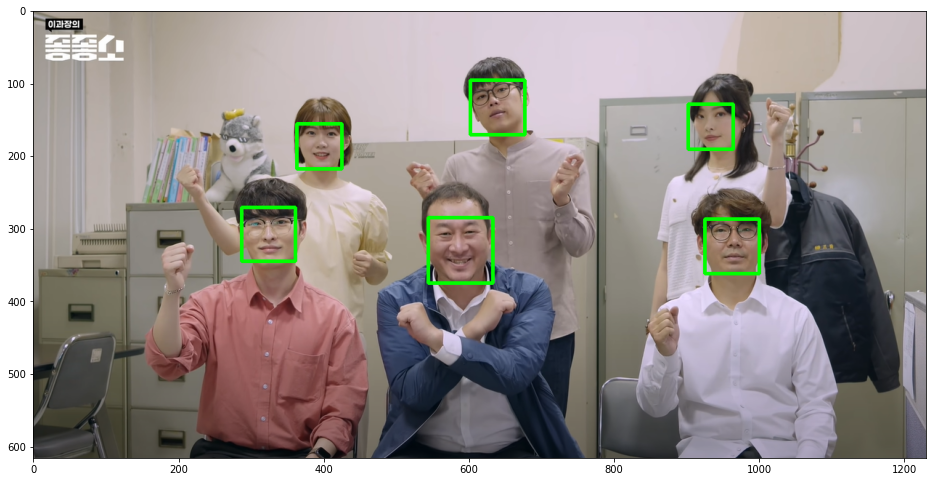

In [9]:
# 이미지 버퍼 출력
plt.rcParams['figure.figsize'] = (16, 16)
plt.imshow(image)
plt.show()

Req-8. 명세서 12p를 참고하여 4명의 인물사진에서 얼굴을 감지하여 인코딩을 한 후 새로운 인물사진 unknown을 입력 받아 기존 4명의 얼굴 중 동일인을 찾는 코드를 구현 및 실행해 보세요.


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
plt.rcParams["figure.figsize"] = (1,1)

# 이미지 파일을 로드하여 known_person_list 리스트 생성
known_person_list = []
known_person_list.append(fr.load_image_file("/content/drive/MyDrive/person1.png"))
known_person_list.append(fr.load_image_file("/content/drive/MyDrive/person2.png"))
known_person_list.append(fr.load_image_file("/content/drive/MyDrive/person3.png"))
known_person_list.append(fr.load_image_file("/content/drive/MyDrive/person4.png"))

In [15]:
# 얼굴을 인식을 하여 감지된 부분을 잘라낸 다음 known_face_list에 저장
known_face_list = []
for person in known_person_list:

  # 얼굴 좌표를 알아내서 잘라낸다
  top, right, bottom, left = fr.face_locations(person)[0]
  face_image = person[top:bottom, left:right]

  # known_face_list에 잘라낸 face_image를 저장
  known_face_list.append(face_image)

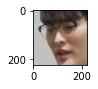

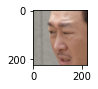

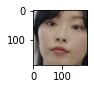

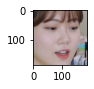

In [16]:
# known_face_list에 저장된 얼굴들 출력
for face in known_face_list:
  plt.imshow(face)
  plt.show()

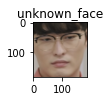

In [18]:
# 기존 리스트에 없는 새로운 파일을 열어서
unknown_person = fr.load_image_file("/content/drive/MyDrive/person5.png")

# 얼굴 좌표를 알아내서 잘라낸다
top, right, bottom, left = fr.face_locations(unknown_person)[0]
unknown_face = unknown_person[top:bottom, left:right]

# unknown_face 이라는 타이틀을 붙여서 표시
plt.title("unknown_face")
plt.imshow(unknown_face)
plt.show()


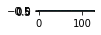

In [19]:
# unknown_person_face를 인코딩
enc_unknown_face = fr.face_encodings(unknown_face)

# 화면에 표시해보면 다음과 같다
plt.imshow(enc_unknown_face)
plt.show()

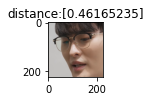

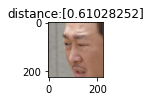

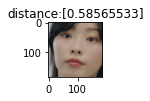

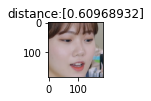

In [21]:
# 등록된 얼굴 리스트를 비교
for face in known_face_list:

  # 등록된 얼굴을 128-dimensional face 인코딩
  enc_known_face = fr.face_encodings(face)

  # 등록된 얼굴과 새로운 얼굴의 distance를 얻기
  distance = fr.face_distance(enc_known_face, enc_unknown_face[0])

  # distance 수치를 포함한 얼굴 출력
  plt.title("distance:" + str(distance))
  plt.imshow(face)
  plt.show()